<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_12/les_12_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Text Recognition

 [tesseract-ocr](https://github.com/tesseract-ocr/tesseract)

 [Tesseract User Manual](https://tesseract-ocr.github.io/tessdoc/)

In [ ]:
# !sudo apt install tesseract-ocr # залежно від вашоі операційної системи
# !conda install pytesseract

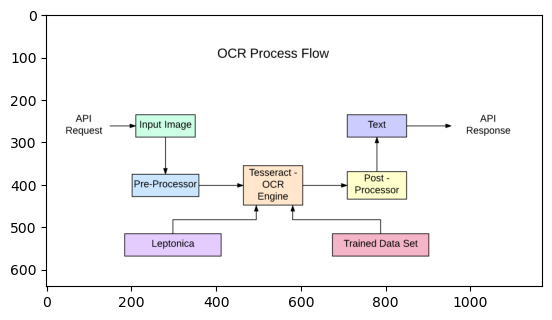

In [ ]:
from PIL import Image

img = Image.open('ocr_flow.png')
plt.imshow(img)

In [ ]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract' # для Linux
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' # для Windows

text = pytesseract.image_to_string(img, lang='eng')
text

'API\nRequest\n\n—»} Input Image\n\n|\n\nOCR Process Flow\n\nText\n\n-———>\n\nPre-Processor\n\n-————>\n\nTesseract -\n\nOCR\nEngine\n\n|\n\n-————>)\n\nPost -\nProcessor\n\ni\n\nt\n\nLeptonica\n\nTrained Data Set\n\nAPI\nResponse\n'

In [ ]:
print(text)

API
Request

—»} Input Image

|

OCR Process Flow

Text

-———>

Pre-Processor

-————>

Tesseract -

OCR
Engine

|

-————>)

Post -
Processor

i

t

Leptonica

Trained Data Set

API
Response



# TF-IDF

In [ ]:
df = pd.DataFrame(
    {'text': [
        'Load the 20 newsgroups dataset and vectorize it. We use a few heuristics',
        'to filter out useless terms early on: the posts are stripped of headers,',
        'futers and quotes replies, and common English words, words occurring in',
        'only one document or in at least 95% of the documents are removed.',
    ]}
)
df

,text
0,Load the 20 newsgroups dataset and vectorize i...
1,to filter out useless terms early on: the post...
2,"futers and quotes replies, and common English ..."
3,only one document or in at least 95% of the do...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Vectorization of text data

tfidf_vectorizer = TfidfVectorizer(
    stop_words='english'
)
tfidf = tfidf_vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(tfidf.todense(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,20,95,common,dataset,document,documents,early,english,filter,futers,...,posts,quotes,removed,replies,stripped,terms,use,useless,vectorize,words
0,0.377964,0.0,0.000000,0.377964,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.377964,0.000000,0.377964,0.000000
1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.377964,0.000000,0.377964,0.000000,...,0.377964,0.000000,0.0,0.000000,0.377964,0.377964,0.000000,0.377964,0.000000,0.000000
2,0.000000,0.0,0.316228,0.000000,0.0,0.0,0.000000,0.316228,0.000000,0.316228,...,0.000000,0.316228,0.0,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,0.632456
3,0.000000,0.5,0.000000,0.000000,0.5,0.5,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Preprocessing

Preprocessing text data is crucial for machine learning tasks.
It involves cleaning, normalizing, and transforming text into a format suitable for analysis.
Common steps include removing punctuation, converting to lowercase, stemming or lemmatization,
and tokenization. These steps help reduce noise, improve model performance, and ensure that the
text data is consistent and interpretable by machine learning algorithms.

In [ ]:
# !python -m spacy download en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp

In [ ]:
df["text"][0]

'Load the 20 newsgroups dataset and vectorize it. We use a few heuristics'

In [ ]:
doc = nlp(df['text'][0])
doc

Load the 20 newsgroups dataset and vectorize it. We use a few heuristics

In [ ]:
[token.text for token in doc]

['Load',
 'the',
 '20',
 'newsgroups',
 'dataset',
 'and',
 'vectorize',
 'it',
 '.',
 'We',
 'use',
 'a',
 'few',
 'heuristics']

In [ ]:
the_testament_text = (
    "When I die, then bury me On a rolling plain. "
    "Raise my barrow in the soil Of my dear Ukraine. "
    "With the wheatfiels and the cliffs "
    "Of a plunging shore In my sight, where "
    "I can hear The booming Dnipro's roar. "
)
t_doc = nlp(the_testament_text)
list(t_doc.sents)

[When I die, then bury me On a rolling plain.,
 Raise my barrow in the soil Of my dear Ukraine.,
 With the wheatfiels and the cliffs Of a plunging shore In my sight, where I can hear The booming Dnipro's roar.]

In [ ]:
for token in t_doc:
    print(
        f"{str(token.text_with_ws):22}"
        f"{str(token.is_alpha):15}"
        f"{str(token.is_punct):18}"
        f"{str(token.is_stop)}"
    )

When                  True           False             True
I                     True           False             True
die                   True           False             False
,                     False          True              False
then                  True           False             True
bury                  True           False             False
me                    True           False             True
On                    True           False             True
a                     True           False             True
rolling               True           False             False
plain                 True           False             False
.                     False          True              False
Raise                 True           False             False
my                    True           False             True
barrow                True           False             False
in                    True           False             True
the                   True      

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

print(len(STOP_WORDS))  # Кількість стоп-слів

# Перетворюємо set на list і беремо перші 10
stopwords_list = list(STOP_WORDS)
print(stopwords_list[:10])

326
['whatever', 'part', 'alone', 'something', 'an', 'across', 'between', 'noone', 'then', 'full']


In [ ]:
print([token for token in t_doc if not token.is_stop and not token.is_punct])

[die, bury, rolling, plain, Raise, barrow, soil, dear, Ukraine, wheatfiels, cliffs, plunging, shore, sight, hear, booming, Dnipro, roar]


In [ ]:
for token in t_doc:
    if str(token) != str(token.lemma_):
        print(f"{str(token):>20} : {str(token.lemma_)}")

                When : when
                  me : I
                  On : on
               Raise : raise
                  Of : of
                With : with
          wheatfiels : wheatfiel
              cliffs : cliff
                  Of : of
            plunging : plunge
                  In : in
                 The : the


# POS (part of speech) tagging

In [ ]:
for token in t_doc[:6]:
    print(
        f"""
        TOKEN: {str(token)}
        ============================
        TAG: {str(token.tag_):10} POS: {str(token.pos_)}, DEP: {token.dep_}
        EXPLANATION: {spacy.explain(token.tag_)}"""
    )


        TOKEN: When
        TAG: WRB        POS: SCONJ, DEP: advmod
        EXPLANATION: wh-adverb

        TOKEN: I
        TAG: PRP        POS: PRON, DEP: nsubj
        EXPLANATION: pronoun, personal

        TOKEN: die
        TAG: VBP        POS: VERB, DEP: advcl
        EXPLANATION: verb, non-3rd person singular present

        TOKEN: ,
        TAG: ,          POS: PUNCT, DEP: punct
        EXPLANATION: punctuation mark, comma

        TOKEN: then
        TAG: RB         POS: ADV, DEP: advmod
        EXPLANATION: adverb

        TOKEN: bury
        TAG: VB         POS: VERB, DEP: ROOT
        EXPLANATION: verb, base form


In [ ]:
from spacy import displacy
displacy.render(t_doc[:6], style='dep', jupyter=True)

In [ ]:
displacy.render(nlp('Taras Shevchenko was a Ukrainian poet, writer, artist, and political figure from Cherkasy Oblast.'), style='ent', jupyter=True)

# Word2Vec

In [ ]:
# !pip install --upgrade gensim

In [ ]:
from gensim.models import Word2Vec

sentences = [
    ['this', 'it', 'the', 'first', 'sentence', 'for', 'word2vec'],
    ['this', 'is', 'the', 'second', 'sentence'],
    ['yet', 'another', 'sentence'],
    ['one', 'more', 'sentence'],
    ['and', 'the', 'final', 'sentence']
]
model = Word2Vec(sentences, min_count=1,)
print(model)

Word2Vec<vocab=15, vector_size=100, alpha=0.025>


In [ ]:
words = list(model.wv.index_to_key)
len(words), words

(15,
 ['sentence',
  'the',
  'this',
  'one',
  'final',
  'and',
  'more',
  'second',
  'yet',
  'another',
  'is',
  'for',
  'word2vec',
  'first',
  'it'])

In [ ]:
model.wv['sentence'] # отримання вектору для слова 'sentence'

array([-5.3743873e-04,  2.3576520e-04,  5.1037343e-03,  9.0110758e-03,
       -9.3036881e-03, -7.1194777e-03,  6.4585716e-03,  8.9754118e-03,
       -5.0167972e-03, -3.7654662e-03,  7.3818457e-03, -1.5351686e-03,
       -4.5371605e-03,  6.5551051e-03, -4.8603001e-03, -1.8137706e-03,
        2.8782713e-03,  9.9111465e-04, -8.2851183e-03, -9.4511500e-03,
        7.3124678e-03,  5.0705937e-03,  6.7588845e-03,  7.6129159e-04,
        6.3527878e-03, -3.4055999e-03, -9.4815053e-04,  5.7705576e-03,
       -7.5221914e-03, -3.9360663e-03, -7.5100865e-03, -9.2990673e-04,
        9.5400428e-03, -7.3184115e-03, -2.3342869e-03, -1.9364782e-03,
        8.0792466e-03, -5.9301918e-03,  4.5987697e-05, -4.7524469e-03,
       -9.6028568e-03,  5.0077443e-03, -8.7621408e-03, -4.3923110e-03,
       -3.5979538e-05, -2.9550152e-04, -7.6618288e-03,  9.6160490e-03,
        4.9826368e-03,  9.2351921e-03, -8.1576770e-03,  4.4961791e-03,
       -4.1381367e-03,  8.2628900e-04,  8.4999176e-03, -4.4627618e-03,
      

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # зменшення розмірності до 2
result = pca.fit_transform(model.wv[model.wv.index_to_key])  # отримання 2D представлення слів
pca.explained_variance_ratio_.sum() # Пояснена дисперсія, що показує, скільки інформації зберігається в 2D представленні

0.23299967

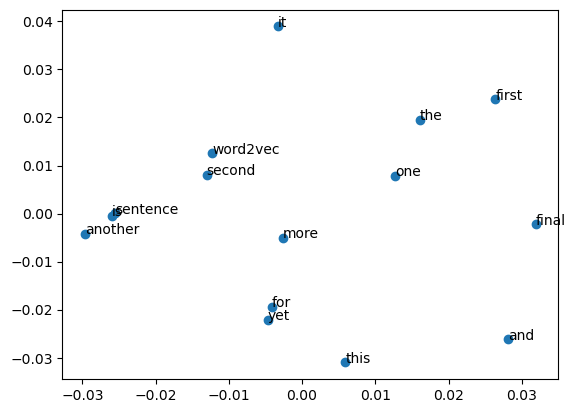

In [ ]:
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# pretrained

In [ ]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')  # Завантаження попередньо натренованої моделі Word2Vec
print(model)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
KeyedVectors<vector_size=300, 3000000 keys>


In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)
print(result)  # Виведення найбільш схожих слів

[('queen', 0.7118192911148071), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951)]


## Word2Vec
<img src='https://github.com/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_12/Word2Vec.png?raw=1'>

# Embeddings

In [ ]:
import tensorflow as tf

n_words = 10

messages = np.random.randint(n_words, size=(1, 2, 5))

display(messages)

# batch, messages, words

2025-07-30 16:57:23.353034: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-30 16:57:23.524055: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


array([[[8, 5, 1, 2, 4],
        [6, 6, 3, 6, 8]]])

In [ ]:
output = tf.keras.layers.Embedding(10, 6)(messages)
display(output)

# batch, messages, words, embedding_depth

<tf.Tensor: shape=(1, 2, 5, 6), dtype=float32, numpy=
array([[[[ 0.01054913, -0.02483598,  0.04815495,  0.03786694,
           0.02911199,  0.02827698],
         [-0.00281533,  0.04060265,  0.04618018,  0.02589181,
          -0.01058416, -0.03287228],
         [-0.00643258,  0.03967789,  0.04635021,  0.00690912,
          -0.035212  ,  0.04926426],
         [-0.00799267, -0.01339795,  0.02494638, -0.01356424,
           0.0370427 ,  0.02687675],
         [ 0.04348426,  0.00076679,  0.02110538,  0.0245252 ,
          -0.03094492, -0.00618834]],

        [[-0.01853035, -0.03914261,  0.0204382 , -0.03572381,
           0.0330605 , -0.01862079],
         [-0.01853035, -0.03914261,  0.0204382 , -0.03572381,
           0.0330605 , -0.01862079],
         [-0.01856383, -0.02377769, -0.01368314,  0.01510142,
          -0.02739493, -0.01061372],
         [-0.01853035, -0.03914261,  0.0204382 , -0.03572381,
           0.0330605 , -0.01862079],
         [ 0.01054913, -0.02483598,  0.04815495,  0.0